# ME 7160 Project


### Solution to Van der Pol oscilator via FFT method:

#### Following equation to be solved.

**$\ddot{x} + (x^2 - 1)\dot{x} + x = Fcos(2\pi t)$**

[ 0.25246607+0.j          0.17685731+0.35713626j -0.33496532+1.2035699j
  3.18035544-2.90617482j  1.35151953-0.33316954j  1.35151953+0.33316954j
  3.18035544+2.90617482j -0.33496532-1.2035699j   0.17685731-0.35713626j]
[  1.00000000e-11+0.j   1.00000000e+00+0.j   2.00000000e+00+0.j
   3.00000000e+00+0.j   4.00000000e+00+0.j  -4.00000000e+00+0.j
  -3.00000000e+00+0.j  -2.00000000e+00+0.j  -1.00000000e+00+0.j]
Optimization terminated successfully.

C:\Users\WSUadm\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  amin, amax, isave, dsave)
C:\Users\WSUadm\Anaconda3\lib\site-packages\ipykernel\__main__.py:57: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\WSUadm\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\WSUadm\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



         Current function value: 0.020940
         Iterations: 100
         Function evaluations: 2540
         Gradient evaluations: 127
Values of x after optimization:
[ 0.30295926+0.j         -0.87136552+0.35713626j -0.56458617+1.2035699j
 -0.16718106-2.90617482j -0.66856462-0.33316954j  1.68772775+0.33316954j
 -5.38572508+2.90617482j  0.24818793-1.2035699j  -0.87136551-0.35713626j]
[ -8.91587796e-07+0.j   1.37551947e+00+0.j   8.81050325e-02+0.j
  -1.46283668e-01+0.j  -1.89364165e+00+0.j   2.61421691e-02+0.j
  -4.07791760e-02+0.j   2.33645726e-01+0.j  -1.37551948e+00+0.j]
[ 0.30295926+0.j         -0.87136552+0.35713626j -0.56458617+1.2035699j
 -0.16718106-2.90617482j -0.66856462-0.33316954j]
[ -8.91587796e-07+0.j   1.37551947e+00+0.j   8.81050325e-02+0.j
  -1.46283668e-01+0.j  -1.89364165e+00+0.j]


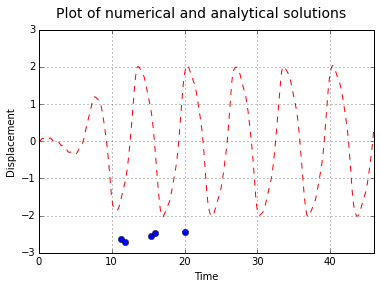

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 10 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

Fn = 1.2

#x0=0.25*np.ones(N-1)
#X0=np.fft.fft(x0)
x0=1.0*np.cos((2*np.pi*t)/1)
X0=np.fft.fft(x0)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = Fn*np.cos((2*np.pi*t))
F = np.fft.fft(f)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

x0 = np.append(X0, freq)
#print(x0)
print(x0[0:(N-1)])
print(x0[(N-1)::])

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(X):
    
    X1 = X[0:(N-1)]
    afreq = X[(N-1)::]
    
    #X = np.fft.fft(x1)
    #xddot = np.fft.ifft(-freq**2*X)
    #xdot = np.fft.ifft(1j*freq*X)
    
    #res = xddot + (x**2 - 1)*xdot + x - f
    res = -afreq**2*X1 + (X1**2 - 1)*(1j*afreq*X1) + X1 - F
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
#print(sol.x)

Fcoeff = sol.x[0:(N-1)]
omega = sol.x[(N-1)::]

print(Fcoeff)
print(omega)

Fcoeff2 = Fcoeff[0:np.ceil(N/2)]
print(Fcoeff2)
omega2 = omega[0:np.ceil(N/2)]
print(omega2)

tf=np.linspace(0.0, 20, 40)

f_negT = 0
for i in range(len(Fcoeff)-1, 0, -1):
    f_neg = Fcoeff[i]*np.exp(-1j*omega[i]*tf)
    f_negT = f_neg + f_negT

f_posT = 0
for i in range(len(Fcoeff)):
    f_pos = Fcoeff[i]*np.exp(1j*omega[i]*tf)
    f_posT = f_pos + f_posT
    
fsol = f_negT + f_posT

f_neg2T = 0
for j in range(len(Fcoeff2)-1, 0, -1):
    f_neg2 = Fcoeff2[j]*np.exp(-1j*omega2[j]*tf)
    f_neg2T = f_neg2 + f_negT

f_pos2T = 0
for j in range(len(Fcoeff2)):
    f_pos2 = np.sum(Fcoeff2[j]*np.exp(1j*omega2[j]*tf))
    f_pos2T = f_pos2 + f_pos2T

fsol2 = 2*(f_neg2T + f_pos2T)
    
#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + Fn*np.cos((2*np.pi*t))])

time=np.linspace(0.0,100,2000)
xinit=np.array([0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot(tf, fsol, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([0, 46, -3, 3])
plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) + A_4cos(4\omega t + 4\beta) + A_5cos(5\omega t + 5\beta) + A_6cos(6\omega t + 6\beta) + A_7cos(7\omega t + 7\beta) + A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$,$A_5$,$A_6$,$A_7$,$A_8$,$\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

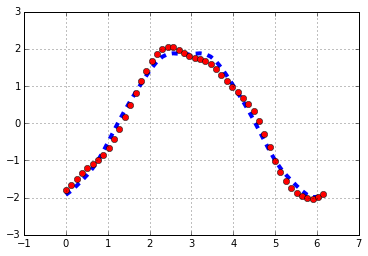

Coefficient values listed below
[ 0.11716254 -1.97070416 -0.11386081  0.03897838 -0.03331461  0.01575909
 -0.03693563 -0.00476715 -0.00455915  1.02477318  0.18442868]


In [2]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4)
plt.plot(t, sol.x, 'ro')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### Fitted equation can be seen below:

In [3]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans

         ⎛51⋅t   9 ⎞         ⎛51⋅t   9 ⎞      ⎛153⋅t   27⎞        ⎛102⋅t   18⎞
  197⋅cos⎜──── + ──⎟   11⋅cos⎜──── + ──⎟   cos⎜───── + ──⎟   3⋅cos⎜───── + ──⎟
         ⎝ 50    50⎠         ⎝ 25    25⎠      ⎝  50    50⎠        ⎝  25    25⎠
- ────────────────── - ───────────────── + ─────────────── - ─────────────────
         100                  100                 25                100       

      ⎛51⋅t   9 ⎞      ⎛153⋅t   27⎞     
   cos⎜──── + ──⎟   cos⎜───── + ──⎟     
      ⎝ 10    10⎠      ⎝  25    25⎠   3 
 + ────────────── - ─────────────── + ──
         50                25         25